# Problem Statetment

Load data from digitData2.csv file. The last column of each file presents the label and the rest of the columns are features.
1. Selecting the optimum k value using Silhouette Coefficient and plot the optimum k values.
2. Create clusters using Kmeans and Kmeans++ algorithms with optimal k value found in the previous problem. Report performances using appropriate evaluation metrics. Compare the results.
3. Now repeat clustering using Kmeans for 50 times and report the average performance. Again, compare the results that you have obtained in Q3 using Kmeans++ and explain the difference (if any).
4. Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as ticker
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
sns.set_theme('poster',font_scale=0.7)
seed = 123 # to fix random state
sns.set_style('darkgrid')

# Read the Data

In [2]:
pd.options.display.float_format='{:,.0f}'.format

data=pd.read_csv('digitData.csv',header=None)
display(data.head())
print('Number of observations are :',data.shape[0])
print('Number of features are :',data.shape[1])
print('The last column represents the label and the rest of the columns are features.')

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Number of observations are : 1528
Number of features are : 65
The last column represents the label and the rest of the columns are features.


In [3]:
'''
since the columns have no names -the columns are given names Column 1 to Column 65 ,
'Coulmn 65' is the 'Label_data' and accordingly renamed
'''

no_of_columns = data.shape[1]
column_names = ['Column_{}'.format(i) for i in range(1, data.shape[1]+1)]

data.columns = column_names

data.rename(columns={'Column_65': 'Label_Data'}, inplace=True)
print('\n','The first 10 columns and first five observations','\n')
display(data.iloc[:,:10].head())

print('\n','The last 10 columns and first five observations','\n')
display(data.iloc[:,-10:].head())


 The first 10 columns and first five observations 



,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
0,0,0,5,13,9,1,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0
2,0,0,0,4,15,12,0,0,0,0
3,0,0,7,15,13,1,0,0,0,8
4,0,0,0,1,11,0,0,0,0,0



 The last 10 columns and first five observations 



,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64,Label_Data
0,0,0,0,6,13,10,0,0,0,0
1,0,0,0,0,11,16,10,0,0,1
2,0,0,0,0,3,11,16,9,0,2
3,0,0,0,7,13,13,9,0,0,3
4,0,0,0,0,2,16,4,0,0,4


In [4]:
'''
Statistical Summary of the data
'''
pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_rows', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Column_1,"1,528.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
Column_2,"1,528.00",0.30,0.88,0.00,0.00,0.00,0.00,8.00
Column_3,"1,528.00",5.19,4.77,0.00,1.00,4.00,9.00,16.00
Column_4,"1,528.00",11.75,4.31,0.00,10.00,13.00,15.00,16.00
Column_5,"1,528.00",11.89,4.28,0.00,10.00,13.00,15.00,16.00
Column_6,"1,528.00",5.91,5.70,0.00,0.00,4.00,11.00,16.00
Column_7,"1,528.00",1.45,3.44,0.00,0.00,0.00,0.00,16.00
Column_8,"1,528.00",0.14,1.06,0.00,0.00,0.00,0.00,14.00
Column_9,"1,528.00",0.01,0.10,0.00,0.00,0.00,0.00,2.00
Column_10,"1,528.00",2.00,3.15,0.00,0.00,0.00,3.00,16.00


In [5]:
print('Number of Missing Data is', data.isnull().sum().sum()) # check for missing data

Number of Missing Data is 0


In [6]:
print('Number of Duplicated Rows is',data.duplicated().sum()) # check for duplicate rows

Number of Duplicated Rows is 0


In [7]:
print('Number of Duplicated Columns is',data.T.duplicated().sum()) # check for duplicate columns

Number of Duplicated Columns is 2


In [8]:
data.loc[:, data.T.duplicated()] # view the duplicated columns

,Column_33,Column_40
0,0.00,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.00,0.00
7,0.00,0.00
8,0.00,0.00
9,0.00,0.00


In [9]:
# features that have all values as 0

zero_features = data.columns[data.eq(0).all(axis=0)]
print(zero_features)

Index(['Column_1', 'Column_33', 'Column_40'], dtype='object')


### We see that Col 1 , Col 33, and Col 40 have all values as zero. We drop all these columns along with the last column of Label Data

In [10]:
features_to_drop = ['Column_1', 'Column_33', 'Column_40','Label_Data']
data_clean = data.drop(features_to_drop, axis=1)

In [11]:
print('Number of Duplicated Columns is',data_clean.T.duplicated().sum()) # check for duplicate columns

Number of Duplicated Columns is 0


In [12]:
display(data_clean.describe().T['std'].min())
display(data_clean.describe().T['std'].max())

0.025582225504832336

6.5254865173632846

### Std Deviation of the features vary from 0.02 to 6.53

In [13]:
display(data_clean.describe().T['mean'].min())
display(data_clean.describe().T['mean'].max())


0.0006544502617801048

12.12107329842932

### Mean of the features vary from 0.0006 to 12.12
### Features in the data are not in the same scale their variance is also different and hence will require scaling

# Scale the data



In [14]:
scaler = StandardScaler()
data_scaled=pd.DataFrame(data=scaler.fit_transform(data_clean),
                         columns=data_clean.columns)
data_scaled.head()

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,...,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
0,-0.34,-0.04,0.29,-0.68,-0.86,-0.42,-0.13,-0.06,-0.64,0.48,...,-0.78,-0.22,-0.03,-0.31,0.09,0.20,-0.42,-1.19,-0.53,-0.21
1,-0.34,-1.09,0.06,0.26,-0.16,-0.42,-0.13,-0.06,-0.64,-1.92,...,-0.78,-0.22,-0.03,-0.31,-1.09,-0.26,0.82,0.49,-0.53,-0.21
2,-0.34,-1.09,-1.80,0.73,1.07,-0.42,-0.13,-0.06,-0.64,-1.37,...,0.22,-0.22,-0.03,-0.31,-1.09,-2.08,-0.22,1.49,1.58,-0.21
3,-0.34,0.38,0.75,0.26,-0.86,-0.42,-0.13,-0.06,1.90,0.48,...,1.03,-0.22,-0.03,-0.31,0.29,0.20,0.20,0.32,-0.53,-0.21
4,-0.34,-1.09,-2.49,-0.21,-1.04,-0.42,-0.13,-0.06,-0.64,-1.92,...,-0.78,-0.22,-0.03,-0.31,-1.09,-2.31,0.82,-0.52,-0.53,-0.21


In [15]:
data_copy= data_scaled.copy() # make a copy of the scaled data on which we will work

In [16]:
# Count the number of Outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3-Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = column[(column < LB) | (column > UB)]
    return len(outliers)

# Count outliers for each column and sum the occurrences
total_outliers = sum(data_copy.apply(count_outliers))


print('\n',"\033[1m\033[1mPercentage of Data Points which are outliers:\033[0m",round(total_outliers/data_copy.size*100,2),'%')


 Percentage of Data Points which are outliers: 3.25 %


##### The outliers % being small , and since we do not have any domain knowledge as the features are not named - we do not treat the outliers


  Table showing frequency of the original Labels


,0,1,2,3,4,5,6,7,8,9
Label_Data,152,156,150,157,153,154,155,153,147,151


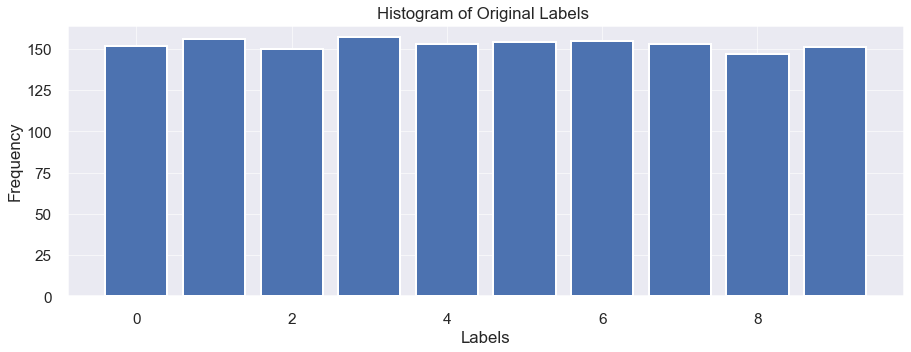

In [17]:
pd.options.display.float_format='{:,.0f}'.format  # display numers with 0 decimal places 
print("\n","\033[1m\033[1m Table showing frequency of the original Labels\033[0m") # print in bold
display(data.Label_Data.value_counts().sort_index().to_frame().T)
print('\n')
plt.figure(figsize=(15,5))
sns.set_context("poster", font_scale = .7, rc={"grid.linewidth": 0.6})
value_counts = data.Label_Data.value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Labels')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.ylabel('Frequency')
plt.title(f'Histogram of Original Labels ');

### Number of Labels supplied in the original data are 10

In [18]:
pd.options.display.float_format='{:,.3f}'.format 

print("\n","\033[1m\033[1mView of the first 10 columns and first five rows\033[0m")
print('________________________________________________________________________________________________')
display(data_copy.iloc[:,:10].head()) # view the first 10 coulmns 
print("\n","\033[1m\033[1mView of the last 10 columns and first five rows\033[0m")
print('________________________________________________________________________________________________')
display(data_copy.iloc[:,-10:].head()) # view the last 10 columns and confirm that Label_Data is dropped

print(data_copy.shape)


 View of the first 10 columns and first five rows
________________________________________________________________________________________________


,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11
0,-0.338,-0.039,0.290,-0.675,-0.862,-0.422,-0.133,-0.064,-0.636,0.482
1,-0.338,-1.089,0.058,0.261,-0.160,-0.422,-0.133,-0.064,-0.636,-1.921
2,-0.338,-1.089,-1.798,0.729,1.070,-0.422,-0.133,-0.064,-0.636,-1.366
3,-0.338,0.381,0.755,0.261,-0.862,-0.422,-0.133,-0.064,1.903,0.482
4,-0.338,-1.089,-2.494,-0.207,-1.038,-0.422,-0.133,-0.064,-0.636,-1.921



 View of the last 10 columns and first five rows
________________________________________________________________________________________________


,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
0,-0.784,-0.218,-0.026,-0.307,0.089,0.201,-0.423,-1.192,-0.528,-0.208
1,-0.784,-0.218,-0.026,-0.307,-1.087,-0.256,0.818,0.485,-0.528,-0.208
2,0.222,-0.218,-0.026,-0.307,-1.087,-2.083,-0.217,1.492,1.576,-0.208
3,1.027,-0.218,-0.026,-0.307,0.285,0.201,0.197,0.318,-0.528,-0.208
4,-0.784,-0.218,-0.026,-0.307,-1.087,-2.312,0.818,-0.521,-0.528,-0.208


(1528, 61)


## There are a total of 61 Features. Let us find the correlation between them

In [19]:
# define a function to highlight cells in a dataframe

def highlight_cells(value):
    if value == 1:
        return 'background-color: orange'
    elif 0.7<=value<1:
        return 'background-color: yellow'
    elif value <= -0.7:
        return 'background-color: green'
    else:
        return ''


In [20]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 
corr=data_copy.corr()
max_corr = corr.max().max()
min_corr = corr.min().min()
corr = corr.style.applymap(highlight_cells)
print('\n','Correlation Matrix with correlated cells more than +0.7 highlighted in yellow and those less than -0.7 highlighted in green')
display(corr)


 Correlation Matrix with correlated cells more than +0.7 highlighted in yellow and those less than -0.7 highlighted in green


,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
Column_2,1.000000,0.562141,0.208535,-0.014230,0.076385,0.056570,-0.041328,0.036395,0.545555,0.222416,-0.123669,0.003921,-0.070403,-0.022793,-0.045858,-0.005394,0.226906,-0.109812,-0.109183,0.072830,-0.176085,-0.132219,-0.040202,-0.012233,-0.069885,-0.129152,0.092035,0.034071,-0.208810,-0.165111,-0.017311,-0.177443,-0.190360,0.034171,-0.071460,-0.230305,-0.174033,-0.019025,-0.129445,-0.166233,-0.005162,-0.040214,-0.145184,-0.082392,-0.030221,-0.012985,0.227078,0.088354,0.027066,0.073334,0.002722,0.019261,-0.051088,-0.008647,0.843019,0.557834,0.204397,-0.079301,-0.034551,0.017342,-0.049026
Column_3,0.562141,1.000000,0.565093,-0.084271,0.043593,0.016368,-0.059476,0.024397,0.577890,0.626789,-0.294872,0.024136,0.047894,-0.086027,-0.099839,-0.018152,0.274138,-0.088707,-0.310456,0.199818,-0.107726,-0.214975,-0.122615,-0.039415,-0.169433,-0.310413,0.128975,0.193113,-0.188532,-0.193831,-0.055778,-0.362614,-0.416926,-0.053139,-0.124777,-0.275392,-0.187076,-0.061300,-0.273727,-0.361094,-0.168842,-0.198552,-0.192375,-0.070232,-0.072759,-0.041840,0.198585,0.241106,-0.048151,-0.043238,0.082502,0.049118,-0.007597,-0.027862,0.530689,0.937747,0.535378,-0.116048,-0.037949,0.077403,0.092180
Column_4,0.208535,0.565093,1.000000,0.026619,-0.188053,-0.104945,-0.029650,0.039434,0.338277,0.614224,-0.013533,-0.092848,-0.001456,-0.177155,-0.106923,0.025291,0.193839,0.046292,-0.381134,0.048650,-0.045667,-0.214615,-0.144047,-0.002084,-0.124796,-0.266743,-0.056918,0.067114,-0.187051,-0.123550,-0.071300,-0.244941,-0.241100,0.018539,-0.095858,-0.222431,-0.012133,-0.076097,-0.244450,-0.095694,-0.019445,-0.264841,-0.219217,0.113873,0.048117,-0.066344,0.018245,0.309390,0.281578,-0.203231,0.032224,0.158405,0.076894,-0.051944,0.181985,0.565621,0.791984,-0.049336,-0.048470,0.059509,0.087982
Column_5,-0.014230,-0.084271,0.026619,1.000000,0.491323,0.122016,0.009775,0.045195,0.064550,0.023841,-0.140380,0.130151,0.388092,0.130194,0.014814,0.010350,0.041122,-0.117429,-0.157443,-0.039277,0.189721,0.079888,0.022289,0.009436,0.031967,-0.068762,0.020092,0.089171,0.122703,0.082519,0.013353,-0.020264,-0.019939,0.037888,0.079961,0.074419,0.045514,0.020755,-0.026335,-0.073508,-0.011788,0.057288,0.073083,-0.093117,-0.039472,0.025926,-0.008082,-0.141746,-0.002677,0.048419,-0.124100,-0.264525,-0.236412,0.018646,-0.041891,-0.018976,-0.001432,-0.084476,-0.230859,-0.265603,-0.238325
Column_6,0.076385,0.043593,-0.188053,0.491323,1.000000,0.612370,0.155010,-0.001242,0.043053,0.054282,-0.199929,-0.058927,0.543886,0.536613,0.111959,-0.028144,0.049195,-0.065374,-0.180829,-0.080891,0.216193,0.155689,-0.002407,-0.024865,0.020710,-0.050850,0.101079,0.159436,0.177217,0.004907,-0.035188,-0.193813,-0.142327,-0.005299,0.101879,0.070687,-0.095722,-0.038672,-0.177687,-0.321406,-0.149617,0.131144,0.024071,-0.267816,-0.086565,-0.011337,-0.039450,-0.290988,-0.144773,0.045992,-0.154590,-0.359687,-0.203123,0.031867,0.080034,0.100042,-0.092633,-0.377010,-0.280539,-0.284949,-0.182834
Column_7,0.056570,0.016368,-0.104945,0.122016,0.612370,1.000000,0.494179,-0.027038,-0.036813,-0.007708,0.013442,-0.071879,0.189072,0.725167,0.364140,-0.020421,-0.038452,0.027153,-0.073483,-0.168980,0.046147,0.283349,0.125960,-0.015274,0.002272,0.024994,0.025753,0.030617,0.143274,0.071704,0.015595,-0.123186,-0.047372,0.039015,0.103646,0.084229,-0.061961,-0.023754,-0.128394,-0.231055,-0.027660,0.183178,-0.067358,-0.242973,-0.037733,-0

#### The highlighted cells show features that have high correlation. For instance Col 59 and Col 3 have a correlation coefficient of 0.937747. So multi-colinaratity exits in the data

## View the Correlation in a heatmap


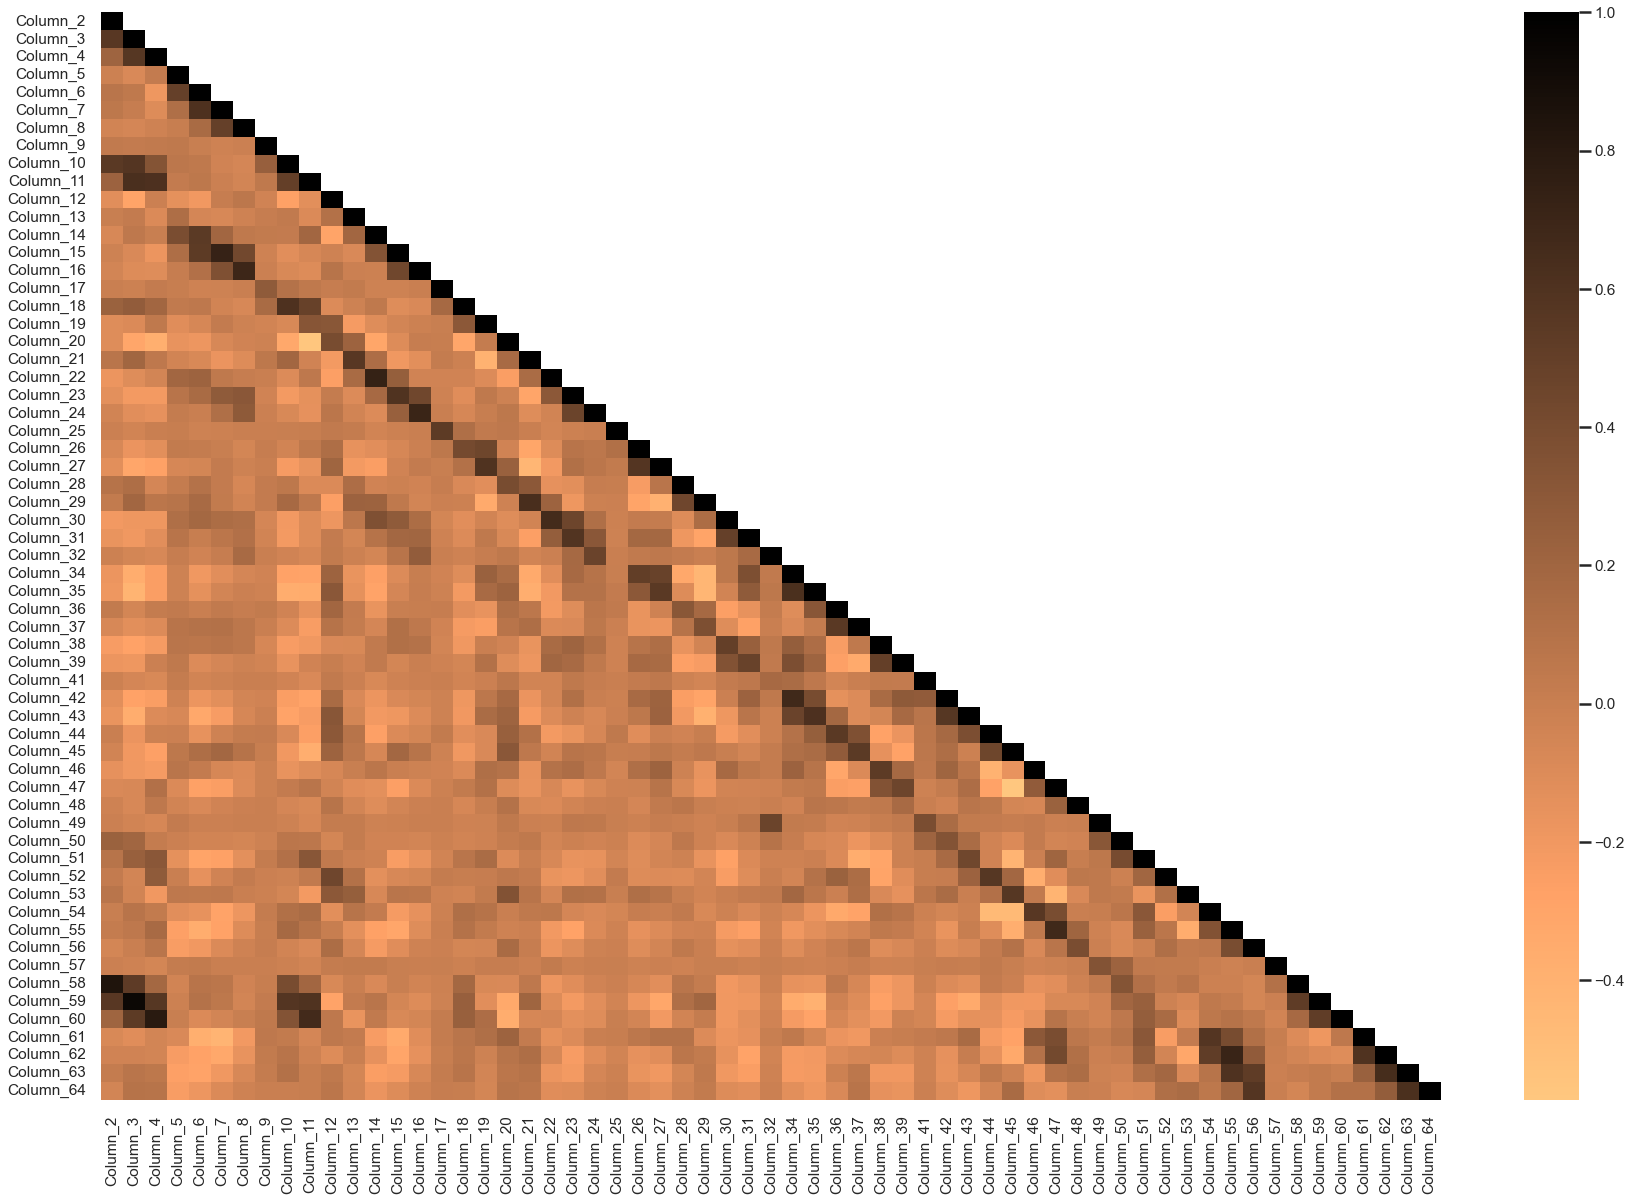

In [21]:
#sns.set_context('paper',font_scale =1.5, rc={"grid.linewidth":0.1})
sns.set_style("white")
plt.figure(figsize=(30,20))
sns.heatmap(data_copy.corr(),
           annot=False,
           mask=np.triu(data_copy.corr(),+1),
           cmap='copper_r',
           vmax=max_corr,
           vmin=min_corr);

# Apply PCA to remove multi-colinearaity and reduce dimensions

###  Bartlett_Sphericity Test to ascertain if we can apply PCA

#### H0: The matrix of population correlations is equal to Identity Matrix
#### H1: The matrix of population correlations is not equal to Identity Matrix

In [22]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_copy)
p_value

0.0

#### Since p-value is less than alpha (0.05) , the null hypothesis is rejected and we conclude that multicollinearity exists in the data

### Kaiser-Meyer-Olkin criterion

#### This statistic represents the degree to which each observed variable ispredicted, without error, by the other variables in the dataset. In general, a KMO < 0.6 is considered inadequate.


In [23]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_copy)
kmo_model

0.7258206785430751

####  KMO value more than 0.6 , so it can be concluded that some features can predict other features

# Principal Component Analysis, decompose to 30 Principal components to start

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=seed)
PCA_list=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
          'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
          'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
df_pca = pca.fit_transform(data_copy)
display(df_pca.shape) # Component output
df_pca=pd.DataFrame(df_pca,
                   columns=PCA_list,
                   index=data_copy.index)
display(df_pca.head())

(1528, 30)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.827,-0.947,-3.939,2.013,-0.193,-0.061,1.294,1.623,-0.343,-0.795,-0.816,-0.792,0.555,-0.318,0.566,0.131,0.200,0.167,0.218,0.425,0.067,0.820,0.430,-0.802,-0.471,0.388,0.336,-0.134,0.312,-0.676
1,0.760,0.831,4.029,-1.737,-1.295,0.333,-1.657,0.286,1.146,-0.066,-0.729,0.846,-0.190,-0.146,-0.664,-0.240,-0.040,-0.209,0.689,-0.141,1.033,-0.134,-0.331,0.410,1.023,0.320,-1.474,0.425,-0.680,-0.572
2,1.445,-0.365,3.119,-1.968,-2.134,0.146,1.768,1.068,0.700,-2.201,1.441,-2.095,-0.625,-0.147,-1.382,0.277,-0.284,-1.005,-0.677,-1.069,-0.529,-0.375,-1.159,-0.284,-0.576,0.169,0.466,-0.299,-0.253,1.153
3,-3.077,-0.709,-0.632,-2.172,-0.404,1.049,-0.259,-1.383,0.388,1.077,-0.870,0.363,-0.242,1.023,0.626,-0.779,-0.705,0.224,1.661,0.395,0.657,-0.019,0.583,-0.625,0.184,-0.863,-0.070,-0.255,-0.012,-1.049
4,4.468,-1.300,0.902,-1.428,-1.635,1.714,-0.265,-0.939,-1.139,1.756,-0.483,-1.765,-0.086,-0.605,0.540,0.355,-0.007,0.060,1.532,1.197,0.460,0.035,0.757,-0.096,0.685,-2.200,0.377,0.392,1.169,0.845


In [25]:
pca.components_   # weights of the PCA's

loadings = pd.DataFrame(pca.components_,
                       index=PCA_list,
                       columns=data_copy.columns)
display(loadings.head(3))
display(loadings.tail(3))
display(loadings.shape)

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
PC1,-0.178,-0.283,-0.221,0.029,0.020,0.061,0.068,-0.037,-0.244,-0.231,0.114,-0.028,-0.028,0.097,0.097,-0.018,-0.139,0.059,0.126,-0.139,0.033,0.173,0.108,0.005,0.117,0.183,-0.069,-0.133,0.124,0.177,0.056,0.236,0.234,0.011,0.028,0.149,0.120,0.050,0.180,0.146,0.057,0.125,0.096,-0.034,0.003,0.030,-0.043,-0.116,-0.026,0.086,-0.083,-0.132,-0.049,0.002,-0.158,-0.275,-0.203,-0.036,-0.116,-0.125,-0.074
PC2,0.061,0.079,-0.013,0.152,0.276,0.249,0.146,0.001,0.040,0.027,-0.101,0.057,0.219,0.262,0.135,-0.007,-0.015,-0.120,-0.093,0.070,0.156,0.138,0.079,-0.005,-0.069,-0.120,0.048,0.162,0.143,0.051,0.025,-0.129,-0.118,0.055,0.113,-0.006,-0.081,-0.026,-0.117,-0.197,0.002,0.143,-0.089,-0.236,-0.080,-0.012,-0.029,-0.178,-0.031,0.068,-0.181,-0.249,-0.119,0.006,0.059,0.099,0.001,-0.256,-0.234,-0.158,-0.069
PC3,0.023,-0.047,-0.043,-0.065,-0.078,-0.022,-0.010,0.006,-0.050,-0.169,0.165,0.078,-0.172,-0.064,-0.025,0.011,-0.106,-0.104,0.212,0.126,-0.185,-0.142,-0.026,0.022,-0.105,-0.049,0.116,0.088,-0.200,-0.170,-0.012,-0.042,0.066,0.271,0.247,-0.198,-0.223,0.012,-0.003,0.071,0.314,0.269,-0.198,-0.189,0.035,0.004,-0.018,-0.054,0.215,0.140,-0.190,-0.018,0.124,0.013,0.037,-0.044,-0.078,-0.058,-0.008,0.124,0.115


,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13,Column_14,Column_15,Column_16,Column_17,Column_18,Column_19,Column_20,Column_21,Column_22,Column_23,Column_24,Column_25,Column_26,Column_27,Column_28,Column_29,Column_30,Column_31,Column_32,Column_34,Column_35,Column_36,Column_37,Column_38,Column_39,Column_41,Column_42,Column_43,Column_44,Column_45,Column_46,Column_47,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57,Column_58,Column_59,Column_60,Column_61,Column_62,Column_63,Column_64
PC28,-0.061,-0.012,0.027,0.131,-0.122,0.091,0.234,0.074,-0.108,0.034,-0.014,0.204,-0.215,-0.056,-0.114,-0.030,-0.011,0.011,-0.112,-0.037,-0.107,0.011,-0.308,-0.037,0.102,-0.003,-0.134,-0.143,0.151,0.094,0.070,-0.124,-0.012,0.165,0.090,0.128,0.009,-0.250,-0.168,-0.104,0.013,0.034,-0.073,-0.142,0.096,0.148,0.388,-0.036,-0.143,-0.040,-0.020,-0.142,-0.106,-0.267,0.021,-0.055,0.021,0.213,0.113,0.057,0.010
PC29,0.087,-0.263,-0.112,-0.084,-0.083,-0.106,0.099,-0.126,0.229,0.027,0.141,-0.079,0.032,-0.111,0.057,-0.040,0.316,-0.066,-0.092,-0.101,0.079,-0.100,-0.013,-0.042,-0.217,-0.086,0.133,-0.023,-0.036,-0.084,-0.054,-0.209,0.019,0.177,-0.127,0.058,0.098,-0.023,0.019,0.092,-0.072,-0.073,0.129,-0.019,-0.149,-0.015,0.213,-0.117,-0.061,-0.056,-0.014,-0.136,0.239,-0.067,0.046,-0.301,0.057,-0.070,-0.232,-0.169,0.209
PC30,-0.034,0.035,-0.147,-0.126,0.196,0.057,0.030,0.044,0.000,0.016,0.021,-0.238,-0.049,-0.125,0.069,-0.005,-0.028,-0.077,-0.116,-0.111,-0.047,-0.318,0.060,0.050,-0.040,-0.110,-0.033,0.099,0.216,-0.042,0.015,-0.056,0.143,0.129,-0.087,0.155,0.169,0.147,-0.217,0.102,-0.088,-0.089,-0.227,-0.092,0.089,-0.080,-0.066,0.216,0.058,0.424,0.137,-0.133,-0.216,0.033,-0.043,0.022,-0.071,0.112,0.044,0.057,0.082


(30, 61)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
index,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
Var_Exp,0.122,0.097,0.084,0.066,0.049,0.043,0.040,0.034,0.031,0.029,0.028,0.025,0.023,0.022,0.022,0.019,0.018,0.016,0.016,0.015,0.013,0.012,0.012,0.010,0.010,0.009,0.009,0.008,0.008,0.007
Cum_Var,0.122,0.219,0.303,0.369,0.419,0.461,0.501,0.535,0.566,0.595,0.622,0.647,0.670,0.692,0.714,0.733,0.751,0.767,0.783,0.797,0.810,0.823,0.834,0.845,0.854,0.864,0.872,0.881,0.889,0.896


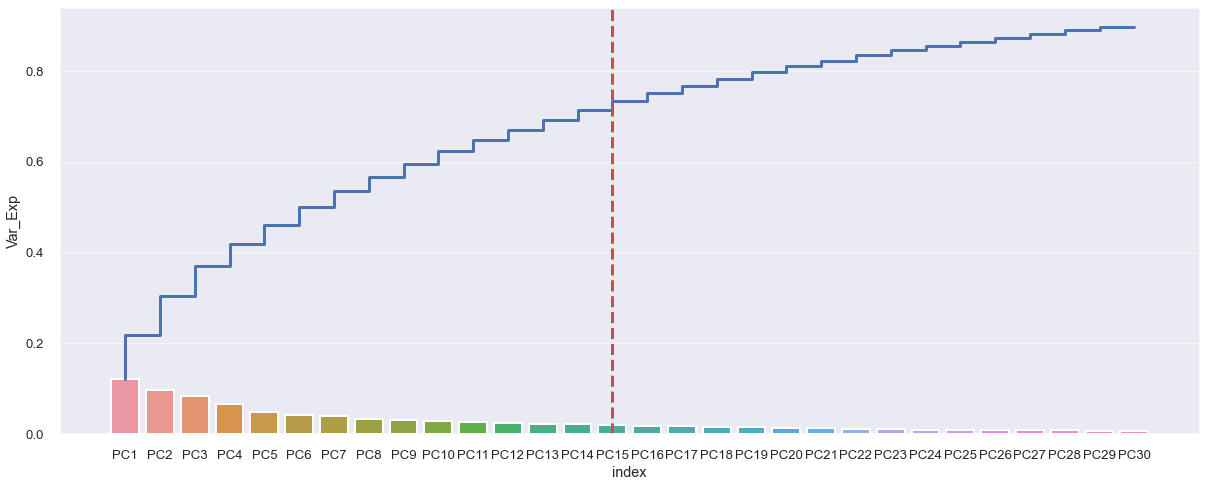

In [26]:
var_exp= pca.explained_variance_ratio_
cum_var_exp= np.cumsum(pca.explained_variance_ratio_)

var_df = pd.DataFrame({'Var_Exp':var_exp,
              'Cum_Var':cum_var_exp},
               index = PCA_list).reset_index(drop=False)

display(var_df.T)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
plt.figure(figsize=(17,7))
sns.barplot(data=var_df,
            y ="Var_Exp",
            x = 'index');  

plt.step(x=var_df.index,
        y=var_df.Cum_Var);
plt.axvline(x=14,ls='--',c='r');
plt.tight_layout();


# So now we will replace the 62 features with 15 Principal components , which together explain 71.4% of the variance in the data

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, random_state=seed)
PCA_list=['PC1','PC2','PC3','PC4','PC5',
          'PC6','PC7','PC8','PC9','PC10',
          'PC11','PC12','PC13','PC14','PC15']
df_pca = pca.fit_transform(data_copy)

df_pca=pd.DataFrame(df_pca,
                   columns=PCA_list,
                   index=data_copy.index)
display(df_pca.head()) # Component output
display(df_pca.shape)  # the new dataframe on which we will work

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,1.827,-0.947,-3.939,2.013,-0.193,-0.060,1.294,1.620,-0.349,-0.798,-0.821,-0.774,0.526,-0.247,0.607
1,0.760,0.831,4.029,-1.737,-1.296,0.332,-1.656,0.283,1.150,-0.063,-0.731,0.848,-0.200,-0.208,-0.693
2,1.445,-0.365,3.119,-1.968,-2.132,0.145,1.765,1.077,0.713,-2.196,1.443,-2.144,-0.541,-0.360,-1.291
3,-3.077,-0.709,-0.632,-2.172,-0.405,1.050,-0.258,-1.392,0.375,1.073,-0.871,0.382,-0.272,1.151,0.451
4,4.468,-1.299,0.901,-1.429,-1.641,1.718,-0.260,-0.958,-1.168,1.747,-0.502,-1.672,-0.189,-0.406,0.484


(1528, 15)

# Clustering using the KMeans++ algorithm

In [28]:
n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_pp= []                                 # create an empty list where WSS sores can be appended
s_score_pp = []                                        # create an empty list where Silhouette sores can be appended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are appended to the 
# empty list created above

for n in n_clusters:
    KM_pp = KMeans(n_clusters=n,
                    init='k-means++',
                    random_state=seed).fit(df_pca)
    
    clusters_inertia_pp.append(KM_pp.inertia_) 
    s_score_pp.append(silhouette_score(df_pca,KM_pp.labels_,random_state=seed))


## Elbow Plot and the Scree Plot using KMeans++ method

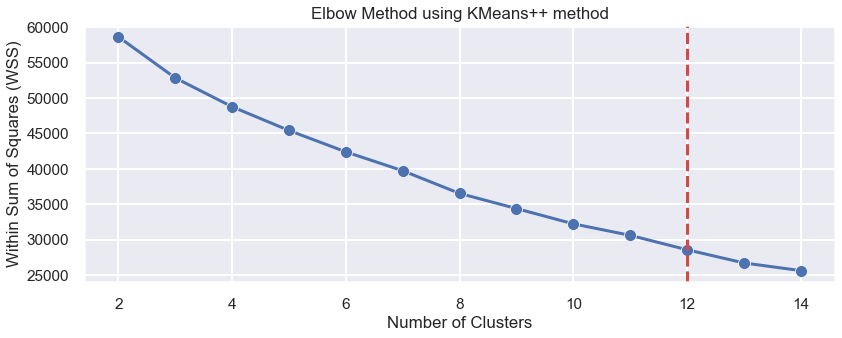

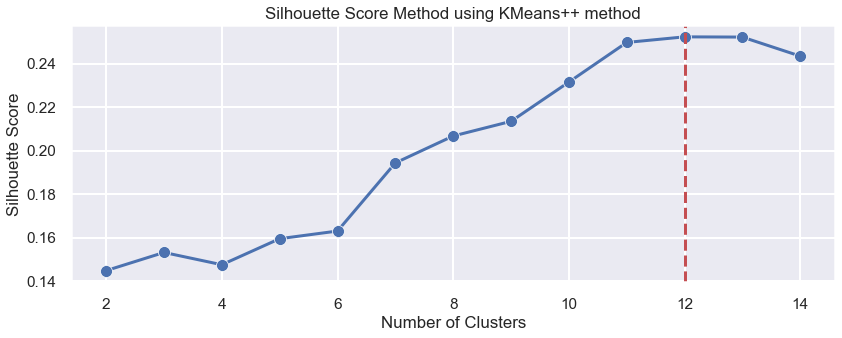

In [29]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                clusters_inertia_pp,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans++ method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_pp,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans++ method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();

## The Silhouette Score for 12 clusters is max

## 12 Clusters using KMeans++ algorithim

In [30]:
KM_pp = KMeans(n_clusters=12,
                      init='k-means++',
                      random_state=seed).fit(df_pca)

KM_clustered = df_pca.copy() # make a copy of the data set, in which we will keep adding the new cluster labels
KM_clustered.loc[:,'Cluster_KMeans_pp'] = KM_pp.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_pp.inertia_)
display(silhouette_score(df_pca,KM_pp.labels_,random_state=seed))

,PC12,PC13,PC14,PC15,Cluster_KMeans_pp
0,-0.774,0.526,-0.247,0.607,1
1,0.848,-0.200,-0.208,-0.693,0
2,-2.144,-0.541,-0.360,-1.291,0
3,0.382,-0.272,1.151,0.451,4
4,-1.672,-0.189,-0.406,0.484,3


(1528, 16)

28600.083389751493

0.25236934256963844

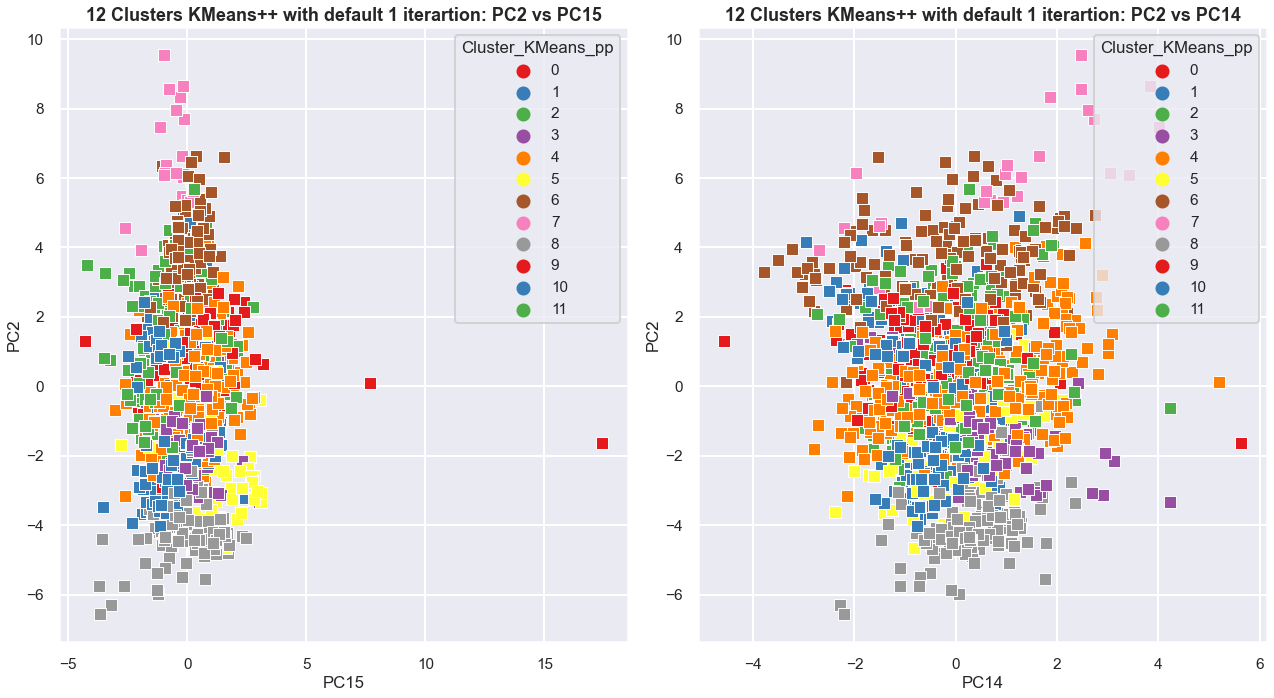

In [31]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_pp',
                       ax=ax[0],
                       palette='Set1',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 18);
                   
sns.scatterplot(data= KM_clustered,
                        x=KM_clustered['PC14'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_pp',
                       ax=ax[1],
                       palette='Set1',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC14',
               fontweight = 'bold',
                fontsize = 18);
'''
ax[0].scatter(KM_pp.cluster_centers_[:,-1],KM_pp.cluster_centers_[:,0],marker='o',color='black',s=100)
ax[1].scatter(KM_pp.cluster_centers_[:,-2],KM_pp.cluster_centers_[:,0],marker='o',color='black',s=100);
'''
plt.tight_layout();

Cluster_KMeans_pp,0,1,2,3,4,5,6,7,8,9,10,11
KM_pp_size,180,154,93,134,352,68,153,27,156,2,96,113


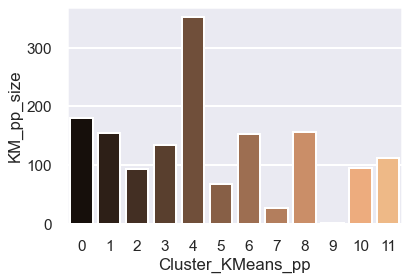

In [32]:
KM_pp_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_pp').size().to_frame()
KM_pp_cluster_sizes.columns = ["KM_pp_size"]
display(KM_pp_cluster_sizes.T)

barplot_KMeans_pp=sns.barplot(data=KM_pp_cluster_sizes,
                                x=KM_pp_cluster_sizes.index,
                                y='KM_pp_size',
                                palette='copper');
barplot_KMeans_pp;

## Performance Evaluation

In [33]:
pd.options.display.float_format='{:,.6f}'.format
resultpp=pd.DataFrame({'WSS':KM_pp.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_pp.labels_)},                           
                     index=['KMeans++ Model using 1 iteration'])
                                   
resultpp

,WSS,Silhouette Score
KMeans++ Model using 1 iteration,"28,600.083390",0.252369


# Clusters using normal KMeans algorithim, init = ' random '

In [34]:
# Clustering using the KMeans++ algorithm

n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_rand= []                                 # create an empty list where WSS sores can be arandended
s_score_rand = []                                        # create an empty list where Silhouette sores can be arandended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are arandended to the 
# empty list created above

for n in n_clusters:
    KM_rand = KMeans(n_clusters=n,
                    init='random',
                    random_state=seed).fit(df_pca)
    
    clusters_inertia_rand.append(KM_rand.inertia_) 
    s_score_rand.append(silhouette_score(df_pca,KM_rand.labels_,random_state=seed))




# Elbow Plot and the Scree Plot using KMeans method

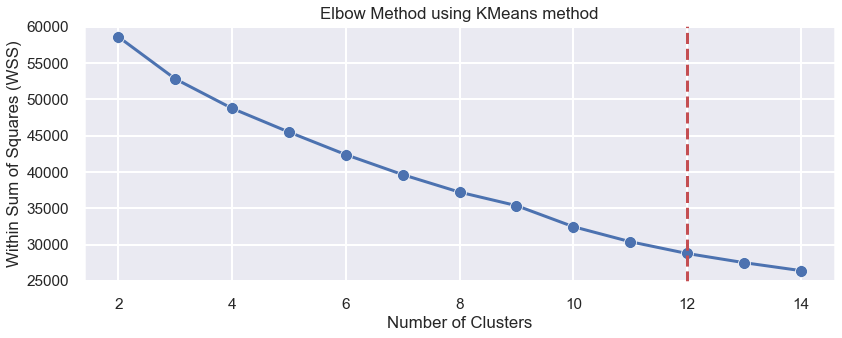

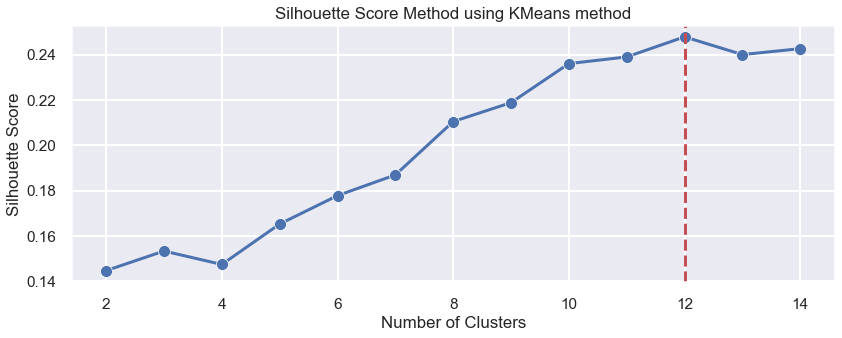

In [35]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                clusters_inertia_rand,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_rand,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


# The Silhouette Score for 12 clusters is max

# 12 Clusters using KMeans algorithim

In [36]:
KM_rand = KMeans(n_clusters=12,
                 init='random',
                 random_state=seed).fit(df_pca)

KM_clustered.loc[:,'Cluster_KMeans_rand'] = KM_rand.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_rand.inertia_)
display(silhouette_score(df_pca,KM_rand.labels_,random_state=seed))


,PC13,PC14,PC15,Cluster_KMeans_pp,Cluster_KMeans_rand
0,0.525568,-0.246650,0.607205,1,1
1,-0.199973,-0.207838,-0.693002,0,6
2,-0.540604,-0.359894,-1.290950,0,6
3,-0.271793,1.151374,0.450683,4,3
4,-0.189244,-0.406024,0.483530,3,8


(1528, 17)

28773.364391615378

0.24795081851644524

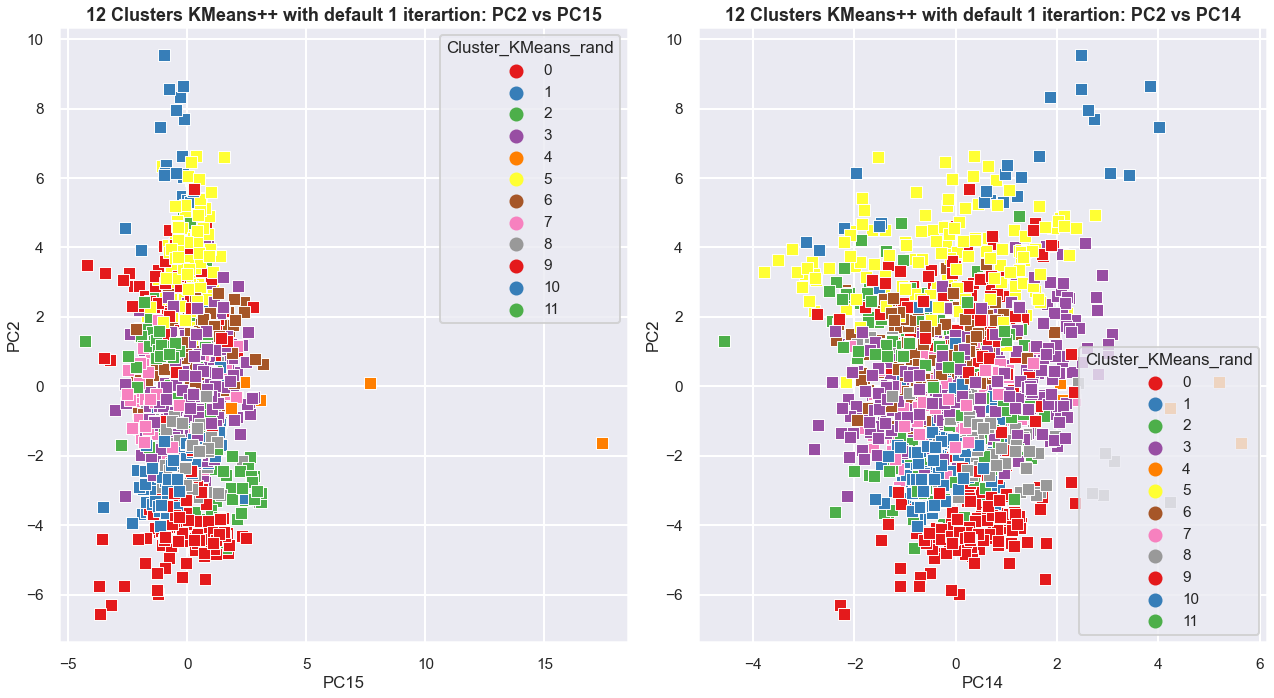

In [37]:
sns.set_context('poster',font_scale = .7, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand',
                       ax=ax[0],
                       palette='Set1',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 18);
                   
sns.scatterplot(data= KM_clustered,
                        x=KM_clustered['PC14'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand',
                       ax=ax[1],
                       palette='Set1',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('12 Clusters KMeans++ with default 1 iterartion: PC2 vs PC14',
               fontweight = 'bold',
                fontsize = 18);
'''
ax[0].scatter(KM_rand.cluster_centers_[:,-1],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100)
ax[1].scatter(KM_rand.cluster_centers_[:,-2],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100);
'''
plt.tight_layout();


Cluster_KMeans_rand,0,1,2,3,4,5,6,7,8,9,10,11
KM_rand_size,113,154,96,352,5,153,178,92,135,156,28,66


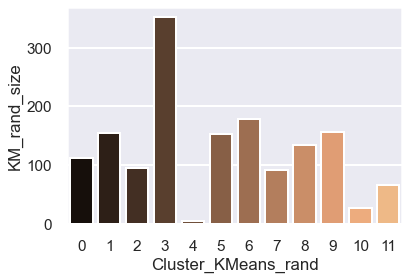

In [38]:
KM_rand_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_rand').size().to_frame()
KM_rand_cluster_sizes.columns = ["KM_rand_size"]
display(KM_rand_cluster_sizes.T)

barplot_KMeans_rand=sns.barplot(data=KM_rand_cluster_sizes,
                                x=KM_rand_cluster_sizes.index,
                                y='KM_rand_size',
                                palette='copper');
barplot_KMeans_rand;

In [39]:
# Performance Evaluation

resultrand=pd.DataFrame({'WSS':KM_rand.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_rand.labels_)},                           
                     index=['KMeans Model using 1 iteration'])
                                   
resultrand


,WSS,Silhouette Score
KMeans Model using 1 iteration,"28,773.364392",0.247951


# Clusters using normal KMeans algorithim, init = ' random ', iterated 50 times


In [40]:
n_clusters= [2,3,4,5,6,7,8,9,10,11,12,13,14]               # create a list of number of clusters for evaluation     
clusters_inertia_rand50= []                                 # create an empty list where WSS sores can be arandended
s_score_rand50 = []                                        # create an empty list where Silhouette sores can be arandended 
seed = 123

# run a loop code so that the WSS scores (Inertia scores) and Silhouette scores for different Clusters are arandended to the 
# empty list created above

for n in n_clusters:
    KM_rand50 = KMeans(n_clusters=n,
                       init='random',
                       n_init= 50 ,
                       random_state=seed).fit(df_pca)
    
    clusters_inertia_rand50.append(KM_rand50.inertia_) 
    s_score_rand50.append(silhouette_score(df_pca,KM_rand50.labels_,random_state=seed))

## Elbow Plot and the Scree Plot using KMeans (50 iterartions) method


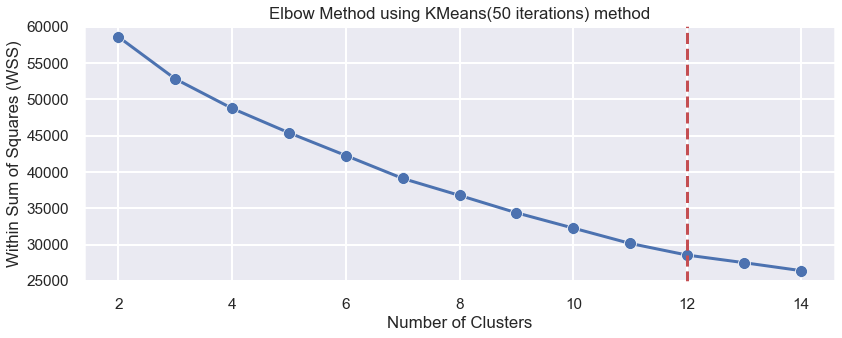

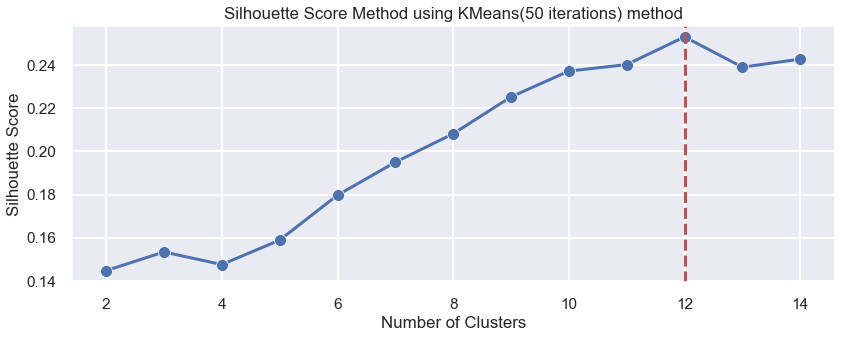

In [41]:
fig,ax =plt.subplots(figsize=(12,5))

ax=sns.lineplot(n_clusters,
                clusters_inertia_rand50,
                ax=ax,
                marker='o')
ax.set_title('Elbow Method using KMeans(50 iterations) method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Within Sum of Squares (WSS)')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


fig,ax =plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,
                s_score_rand50,
                ax=ax,
                marker='o')
ax.set_title('Silhouette Score Method using KMeans(50 iterations) method')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.axvline(x=12,ls='--',c='r')
plt.tight_layout();


## The Silhouette Score for 12 clusters is max

## 12 Clusters using KMeans ( 50 iterations ) algorithim

In [42]:
KM_rand50 = KMeans(n_clusters=12,
                   init='random',
                   n_init=50,
                   random_state=seed).fit(df_pca)

KM_clustered.loc[:,'Cluster_KMeans_rand50'] = KM_rand50.labels_  # add last column as the new Cluster labels created
display(KM_clustered.iloc[:,-5:].head())  # see the last 5 columns view the new column added

display(KM_clustered.shape)
display(KM_rand50.inertia_)
display(silhouette_score(df_pca,KM_rand50.labels_,random_state=seed))

,PC14,PC15,Cluster_KMeans_pp,Cluster_KMeans_rand,Cluster_KMeans_rand50
0,-0.246650,0.607205,1,1,5
1,-0.207838,-0.693002,0,6,4
2,-0.359894,-1.290950,0,6,4
3,1.151374,0.450683,4,3,6
4,-0.406024,0.483530,3,8,9


(1528, 18)

28554.189000103583

0.25305420811702395

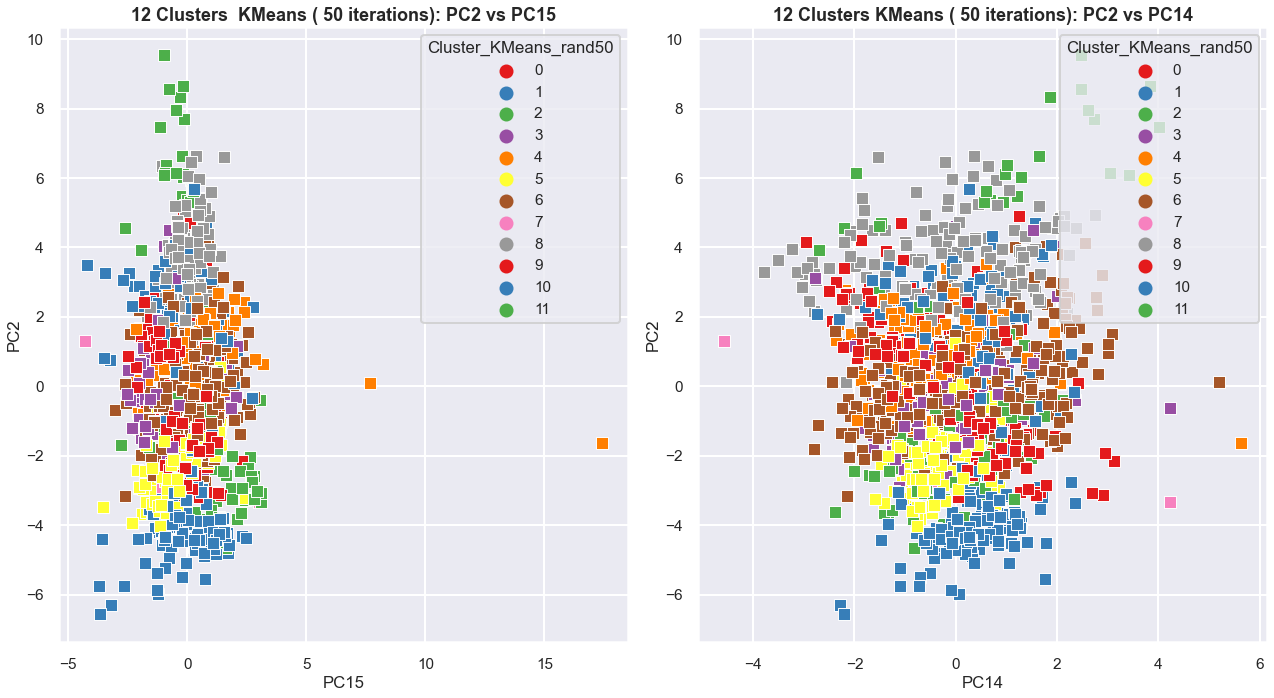

In [43]:
fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand50',
                       ax=ax[0],
                       palette='Set1',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('12 Clusters  KMeans ( 50 iterations): PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 18);
                   
sns.scatterplot(data= KM_clustered,
                        x=KM_clustered['PC14'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_KMeans_rand50',
                       ax=ax[1],
                       palette='Set1',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('12 Clusters KMeans ( 50 iterations): PC2 vs PC14',
               fontweight = 'bold',
                fontsize = 18);
'''
ax[0].scatter(KM_rand.cluster_centers_[:,-1],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100)
ax[1].scatter(KM_rand.cluster_centers_[:,-2],KM_rand.cluster_centers_[:,0],marker='o',color='black',s=100);
'''
plt.tight_layout();

Cluster_KMeans_rand50,0,1,2,3,4,5,6,7,8,9,10,11
KM_rand50_size,95,156,27,97,181,154,342,3,149,133,122,69


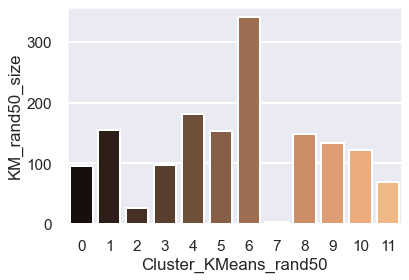

In [44]:
KM_rand50_cluster_sizes = KM_clustered.groupby('Cluster_KMeans_rand50').size().to_frame()
KM_rand50_cluster_sizes.columns = ["KM_rand50_size"]
display(KM_rand50_cluster_sizes.T)

barplot_KMeans_rand50=sns.barplot(data=KM_rand50_cluster_sizes,
                                x=KM_rand50_cluster_sizes.index,
                                y='KM_rand50_size',
                                palette='copper');
barplot_KMeans_rand50;

## Performance Evaluation


In [45]:
resultrand50=pd.DataFrame({'WSS':KM_rand50.inertia_,
                     'Silhouette Score':silhouette_score(df_pca,KM_rand50.labels_)},                           
                     index=['KMeans Model using 50 iterations'])
                                   
resultrand50


,WSS,Silhouette Score
KMeans Model using 50 iterations,"28,554.189000",0.253054


In [46]:
comparision = pd.concat([resultrand,resultrand50,resultpp],axis=0)
comparision

,WSS,Silhouette Score
KMeans Model using 1 iteration,"28,773.364392",0.247951
KMeans Model using 50 iterations,"28,554.189000",0.253054
KMeans++ Model using 1 iteration,"28,600.083390",0.252369


## We note that with increased number of iterations in the Random Centroid Seeding method the Silhouette Score improves.However the KMeans++ algorithim gives high Silhouette score just with 1 iteration

# Apply DBSCAN on this dataset (digitData2.csv) and find the optimum "eps" and "min_samples" value. Is the number of clusters the same as the cluster found in Q2? Explain the similarity or differences that you have found between two solutions.

In [47]:
from sklearn.cluster import DBSCAN

In [48]:
'''
create an array of eps values which we want to try out
'''

episilon =np.linspace(3.2,3.8,10)
episilon

array([3.2       , 3.26666667, 3.33333333, 3.4       , 3.46666667,
       3.53333333, 3.6       , 3.66666667, 3.73333333, 3.8       ])

In [49]:
'''
create an array of min_samples values which we want to try out along with the above created 
array of eps values
'''

min_samples = np.arange(15,18,1)
min_samples

array([15, 16, 17])

In [50]:
import itertools

In [51]:
'''
50 combinations of eps and min_samples, which we will try and see which combination
gives the highest silhouette score
'''

combinations = list(itertools.product(episilon,min_samples))
display(combinations)
N = len(combinations)
N

[(3.2, 15),
 (3.2, 16),
 (3.2, 17),
 (3.2666666666666666, 15),
 (3.2666666666666666, 16),
 (3.2666666666666666, 17),
 (3.3333333333333335, 15),
 (3.3333333333333335, 16),
 (3.3333333333333335, 17),
 (3.4, 15),
 (3.4, 16),
 (3.4, 17),
 (3.466666666666667, 15),
 (3.466666666666667, 16),
 (3.466666666666667, 17),
 (3.533333333333333, 15),
 (3.533333333333333, 16),
 (3.533333333333333, 17),
 (3.6, 15),
 (3.6, 16),
 (3.6, 17),
 (3.6666666666666665, 15),
 (3.6666666666666665, 16),
 (3.6666666666666665, 17),
 (3.7333333333333334, 15),
 (3.7333333333333334, 16),
 (3.7333333333333334, 17),
 (3.8, 15),
 (3.8, 16),
 (3.8, 17)]

30

#### There are 30 combinations of eps and min_samples

In [52]:
'''
Define a function to get the silhouette score from differnt combinations
of eps and min_samples for a dataframe
'''


def get_sc_and_labels(combinations,df):
    scores = []                                   # create an empty list of silhouette scores
    all_labels_list = []                          # create an empty list of labels
    
    for i, ( eps, num_samples ) in enumerate(combinations):                      # run the code for all combinations
        dbscan_cluster_model = DBSCAN(eps=eps,min_samples=num_samples).fit(df)   
        labels = dbscan_cluster_model.labels_      #  find the labels
        labels_set = set(labels)                   # make a set of the labels created
        num_clusters = len(labels_set)             # find the number of clusters
        
        '''
        Reduce the number of clusters by 1 , if -1 is present as a cluster, which represents outliers/noise in the data
        '''

        if -1 in labels_set:
            num_clusters -= 1
            
        
        '''
        ignore those combinations which throw up less than 2 clusters or more than 15 clusters.
        In that case append in the scores list an absurd silhouette score of -10 and 'bad' in the labels list.
        Print: Combination ( _ , _ ) on iteration _ of 35 has _ cluster. Ignore and go to the next combination.
        '''    
        
        if (num_clusters < 2) or (num_clusters > 15):  
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f'Combination {c} on iteration {i+1} of {N} has {num_clusters} cluster.Ignore and go to the next combination.')
            continue
            
        '''
        for all other cases, other than when the number of clusters is less than 2 or more than 100, 
        append the scores and labels to the empty list created earlier.
        print-'Index:  _  , Score :  _    , Labels : [       ], NumClusters : _
        '''

        scores.append(silhouette_score(df,labels))
        all_labels_list.append(labels)
        print(f'Index:{i} , Score : {scores[-1]}, Labels : {all_labels_list[-1]}, NumClusters : {num_clusters}')    
        
        '''
        Get the best scores and the labels associated with that score.
        '''


    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]   
    
    return {'best_epsilon': best_parameters[0],
           'best_min_samples': best_parameters[1],
           'best_labels': best_labels,
           'best_score': best_score,
            
           }
           
            
best_dict = get_sc_and_labels(combinations,df_pca)


Index:0 , Score : 0.08908347989484186, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 7
Index:1 , Score : 0.07144383807295984, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 8
Index:2 , Score : 0.1081364572849197, Labels : [ 0  1 -1 ...  4  4  5], NumClusters : 6
Index:3 , Score : 0.05725148882560342, Labels : [ 0  0 -1 ...  1  1  3], NumClusters : 5
Index:4 , Score : 0.08767358555019211, Labels : [ 0  0 -1 ...  1  1  4], NumClusters : 5
Index:5 , Score : 0.06283419013722932, Labels : [ 0  0 -1 ...  3  3  4], NumClusters : 6
Index:6 , Score : 0.03362158210518146, Labels : [ 0  0 -1 ...  0  0  2], NumClusters : 4
Index:7 , Score : 0.023993202032808993, Labels : [ 0  0 -1 ...  0  0  2], NumClusters : 4
Index:8 , Score : 0.060722113368931095, Labels : [ 0  0 -1 ...  1  1  3], NumClusters : 5
Index:9 , Score : 0.04621821659852119, Labels : [ 0  0 -1 ...  0  0  1], NumClusters : 4
Index:10 , Score : 0.04951479872534056, Labels : [ 0  0 -1 ...  0  0  1], NumClusters : 3
Index:11 , Score : 

## Best Parameters for the DBSCAN algorithm

In [53]:
best_dict

{'best_epsilon': 3.6666666666666665,
 'best_min_samples': 16,
 'best_labels': array([ 0,  0, -1, ...,  0,  0,  0], dtype=int64),
 'best_score': 0.22507361984370544}

In [54]:
KM_clustered['Cluster_DBSCAN'] = best_dict['best_labels']

,-1,0,1
Cluster_DBSCAN,143,1363,22


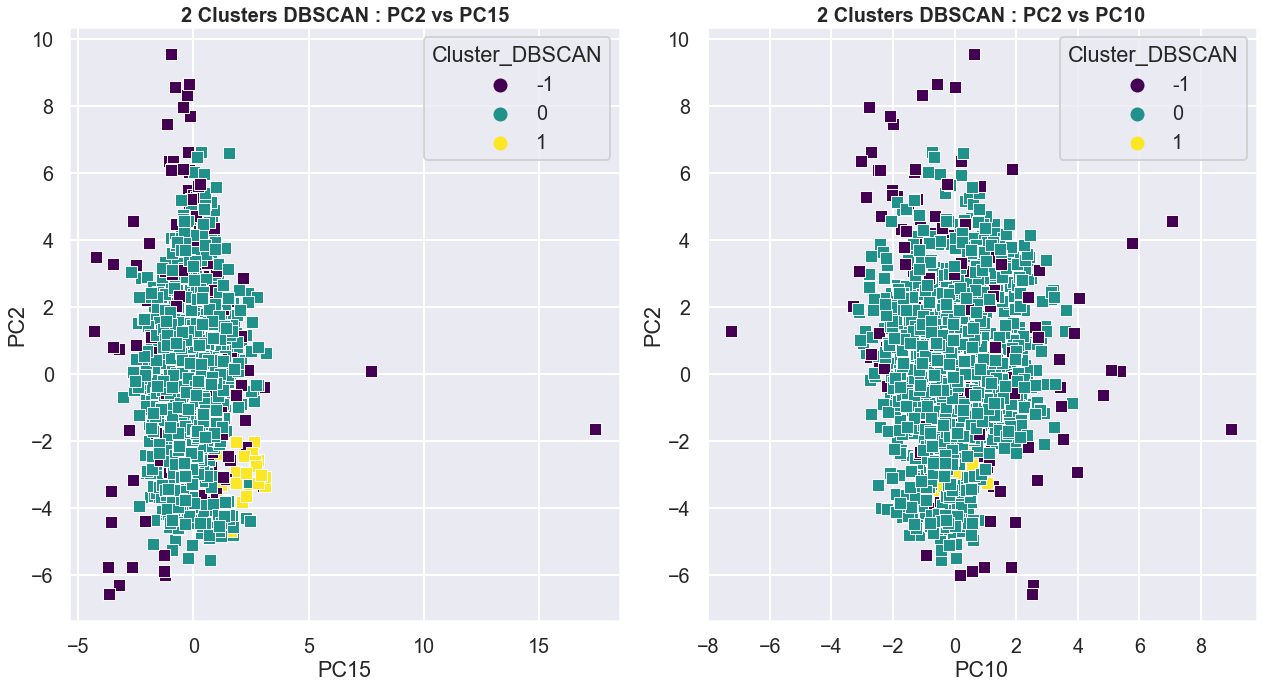

In [55]:
display(KM_clustered['Cluster_DBSCAN'].value_counts().to_frame().sort_index().T)

sns.set_context('poster',font_scale = .9, rc={"grid.linewidth": 2})

fig,(ax) = plt.subplots(1,2,figsize=(18,10))
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC15'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_DBSCAN',
                       ax=ax[0],
                       palette='viridis',
                       legend='full',
                       marker ='s',
                       )
ax[0].set_title('2 Clusters DBSCAN : PC2 vs PC15',
               fontweight = 'bold',
                fontsize = 20);
                   
sns.scatterplot(data= KM_clustered,
                       x=KM_clustered['PC10'],
                       y=KM_clustered['PC2'],
                       hue='Cluster_DBSCAN',
                       ax=ax[1],
                       palette='viridis',
                       legend='full',
                       marker='s',
                       )
ax[1].set_title('2 Clusters DBSCAN : PC2 vs PC10',
               fontweight = 'bold',
                fontsize = 20);

plt.tight_layout()

## DBSCAN only makes 2 clusters  with 1363 and 22 data points.
## 143 data points are considered as outliers ( noise )

## DBSCAN algorithim makes far less clusters than KMeans++ algorithim